In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import Population Data
# Data source: US Census Bureau
# URL Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html
# Dataset URL: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv
population_filename = 'co-est2019-alldata.csv'
population_df = pd.read_csv(population_filename, encoding='latin1', dtype = {'STATE': str, 'COUNTY': str})
population_df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,01,000,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,01,001,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,01,003,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,01,005,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,01,007,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,037,Wyoming,Sweetwater County,43806,43806,43574,...,-17.605427,0.502513,15.035735,-4.614071,-13.140225,-13.762031,-18.484164,-23.515727,-18.743773,-17.065527
3189,50,4,8,56,039,Wyoming,Teton County,21294,21298,21296,...,-1.583464,-2.575509,1.905293,23.259519,12.508872,4.670450,1.253214,-0.171608,-12.432212,1.797445
3190,50,4,8,56,041,Wyoming,Uinta County,21118,21121,21089,...,-9.181105,-18.196975,-4.487730,-10.870861,-15.033634,-10.484550,-11.485101,-18.923455,-13.554993,-9.181105
3191,50,4,8,56,043,Wyoming,Washakie County,8533,8528,8530,...,-7.652085,-12.839390,-3.084589,-1.307811,-18.938032,0.000000,-15.204038,-15.950541,-17.246806,-8.289759


In [3]:
# only keep SUMLEV = 50: County level and/or statistical equivalent
pop_filtered_df = population_df[population_df['SUMLEV'] == 50]
popcol = 'POPESTIMATE2019'
pop_filtered_df = pop_filtered_df[['STATE', 'COUNTY', 'STNAME', 'CTYNAME', popcol]]
pop_filtered_df['FIPS'] = pop_filtered_df['STATE'] + pop_filtered_df['COUNTY']
pop_filtered_df

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,FIPS
1,01,001,Alabama,Autauga County,55869,01001
2,01,003,Alabama,Baldwin County,223234,01003
3,01,005,Alabama,Barbour County,24686,01005
4,01,007,Alabama,Bibb County,22394,01007
5,01,009,Alabama,Blount County,57826,01009
...,...,...,...,...,...,...
3188,56,037,Wyoming,Sweetwater County,42343,56037
3189,56,039,Wyoming,Teton County,23464,56039
3190,56,041,Wyoming,Uinta County,20226,56041
3191,56,043,Wyoming,Washakie County,7805,56043


In [4]:
# Get area of each county
# Data Source: US Census Bureau
# Source URL: https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html
# Dataset URL: https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls
land_area_filename = 'LND01.xls'
land_df = pd.read_excel(land_area_filename, dtype = {'STCOU': str})

# column name containing Land Area in 2010
landcol = 'LND110210D'
land_df = land_df[['Areaname', 'STCOU', landcol]]
land_df

,Areaname,STCOU,LND110210D
0,UNITED STATES,00000,3531905.43
1,ALABAMA,01000,50645.33
2,"Autauga, AL",01001,594.44
3,"Baldwin, AL",01003,1589.78
4,"Barbour, AL",01005,884.88
...,...,...,...
3193,"Sweetwater, WY",56037,10426.65
3194,"Teton, WY",56039,3995.38
3195,"Uinta, WY",56041,2081.26
3196,"Washakie, WY",56043,2238.55


In [5]:
# Combine area data with population data
county_df = pop_filtered_df.merge(land_df, how = 'inner', left_on = 'FIPS', right_on = 'STCOU')
county_df['Population Density'] = county_df[popcol] / county_df[landcol]

# Categorize counties by their population density
percentiles = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', '100th']
county_df['Percentile'] = pd.qcut(county_df['Population Density'], 10, labels = percentiles)
percentile_average_density = county_df.groupby('Percentile')['Population Density'].mean()
percentile_average_density = percentile_average_density.rename('Percentile Average Density')
print(percentile_average_density)
county_df = county_df.merge(percentile_average_density, left_on = 'Percentile', right_on = 'Percentile')
county_df['Label'] = county_df.apply(lambda x: f"{x['Percentile']} Percentile (Average Pop. per sq. mile: {round(x['Percentile Average Density'])})", axis = 1)
county_df

Percentile
10th        2.079104
20th        7.561062
30th       16.624135
40th       26.243543
50th       37.858910
60th       52.877241
70th       76.617968
80th      122.601250
90th      265.077672
100th    2121.066509
Name: Percentile Average Density, dtype: float64


,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,FIPS,Areaname,STCOU,LND110210D,Population Density,Percentile,Percentile Average Density,Label
0,01,001,Alabama,Autauga County,55869,01001,"Autauga, AL",01001,594.44,93.985936,80th,122.601250,80th Percentile (Average Pop. per sq. mile: 123)
1,01,003,Alabama,Baldwin County,223234,01003,"Baldwin, AL",01003,1589.78,140.418171,80th,122.601250,80th Percentile (Average Pop. per sq. mile: 123)
2,01,033,Alabama,Colbert County,55241,01033,"Colbert, AL",01033,592.62,93.214876,80th,122.601250,80th Percentile (Average Pop. per sq. mile: 123)
3,01,043,Alabama,Cullman County,83768,01043,"Cullman, AL",01043,734.84,113.994883,80th,122.601250,80th Percentile (Average Pop. per sq. mile: 123)
4,01,051,Alabama,Elmore County,81209,01051,"Elmore, AL",01051,618.49,131.302042,80th,122.601250,80th Percentile (Average Pop. per sq. mile: 123)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56,031,Wyoming,Platte County,8393,56031,"Platte, WY",56031,2084.21,4.026945,10th,2.079104,10th Percentile (Average Pop. per sq. mile: 2)
3136,56,035,Wyoming,Sublette County,9831,56035,"Sublette, WY",56035,4886.54,2.011853,10th,2.079104,10th Percentile (Average Pop. per sq. mile: 2)
3137,56,037,Wyoming,Sweetwater County,42343,56037,"Sweetwater, WY",56037,10426.65,4.061036,10th,2.079104,10th Percentile (Average Pop. per sq. mile: 2)
3138,56,043,Wyoming,Washakie County,7805,56043,"Washakie, WY",56043,2238.55,3.486632,10th,2.079104,10th Percentile (Average Pop. per sq. mile: 2)


In [6]:
# Get COVID-19 Data
# Data Source: New York Times
# Github URL: https://github.com/nytimes/covid-19-data
covid_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
covid_df = pd.read_csv(covid_url, parse_dates = ['date'], dtype = {'fips': str})
covid_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
771223,2020-11-26,Sweetwater,Wyoming,56037,1598,6
771224,2020-11-26,Teton,Wyoming,56039,1476,2
771225,2020-11-26,Uinta,Wyoming,56041,1016,4
771226,2020-11-26,Washakie,Wyoming,56043,394,8


In [7]:
# Calculate daily new cases and deaths
rolling_average = pd.DataFrame()
for fips, group in covid_df.groupby('fips'):
    
    # calculate the number of new cases/deaths per day
    diff = group[['cases', 'deaths']].diff()
    
    diff['new cases'] = diff['cases'].rolling(7).mean()
    diff['new deaths'] = diff['deaths'].rolling(7).mean()
    
    rolling_average = pd.concat([rolling_average, diff])
    
rolling_average = rolling_average.dropna()
print(rolling_average)

new_covid_df = covid_df.merge(rolling_average[['new cases', 'new deaths']], how = 'inner', left_index = True, right_index = True)
new_covid_df

        cases  deaths  new cases  new deaths
21727     0.0     0.0   0.857143         0.0
23880     3.0     0.0   0.857143         0.0
26101     0.0     0.0   0.571429         0.0
28396     2.0     0.0   0.857143         0.0
30753     0.0     0.0   0.857143         0.0
...       ...     ...        ...         ...
757919    9.0     0.0   5.285714         0.0
761165    1.0     0.0   5.428571         0.0
764411    7.0     0.0   5.428571         0.0
767657    0.0     0.0   4.857143         0.0
770904    0.0     0.0   4.428571         0.0

[741374 rows x 4 columns]


,date,county,state,fips,cases,deaths,new cases,new deaths
22,2020-01-28,Snohomish,Washington,53061,1,0,0.000000,0.000000
27,2020-01-29,Snohomish,Washington,53061,1,0,0.000000,0.000000
32,2020-01-30,Snohomish,Washington,53061,1,0,0.000000,0.000000
37,2020-01-31,Cook,Illinois,17031,2,0,0.142857,0.000000
38,2020-01-31,Snohomish,Washington,53061,1,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
771223,2020-11-26,Sweetwater,Wyoming,56037,1598,6,47.000000,0.000000
771224,2020-11-26,Teton,Wyoming,56039,1476,2,25.428571,0.000000
771225,2020-11-26,Uinta,Wyoming,56041,1016,4,21.000000,0.000000
771226,2020-11-26,Washakie,Wyoming,56043,394,8,17.285714,0.142857


In [8]:
# Merge covid data with county data
merge_df = new_covid_df.merge(county_df, how = 'inner', left_on = 'fips', right_on = 'STCOU')

# scale cases and deaths by population
merge_df['new cases per 100k'] = merge_df['new cases'] / merge_df[popcol] * 1e5
merge_df['new deaths per 100k'] = merge_df['new deaths'] / merge_df[popcol] * 1e5

merge_df = merge_df[['date', 'county', 'state', 'fips', 'Label', 'new cases per 100k', 'new deaths per 100k']]
merge_df

,date,county,state,fips,Label,new cases per 100k,new deaths per 100k
0,2020-01-28,Snohomish,Washington,53061,90th Percentile (Average Pop. per sq. mile: 265),0.000000,0.0
1,2020-01-29,Snohomish,Washington,53061,90th Percentile (Average Pop. per sq. mile: 265),0.000000,0.0
2,2020-01-30,Snohomish,Washington,53061,90th Percentile (Average Pop. per sq. mile: 265),0.000000,0.0
3,2020-01-31,Snohomish,Washington,53061,90th Percentile (Average Pop. per sq. mile: 265),0.000000,0.0
4,2020-02-01,Snohomish,Washington,53061,90th Percentile (Average Pop. per sq. mile: 265),0.000000,0.0
...,...,...,...,...,...,...,...
724576,2020-11-25,Esmeralda,Nevada,32009,10th Percentile (Average Pop. per sq. mile: 2),65.455736,0.0
724577,2020-11-26,Esmeralda,Nevada,32009,10th Percentile (Average Pop. per sq. mile: 2),65.455736,0.0
724578,2020-11-24,Loving,Texas,48301,10th Percentile (Average Pop. per sq. mile: 2),0.000000,0.0
724579,2020-11-25,Loving,Texas,48301,10th Percentile (Average Pop. per sq. mile: 2),0.000000,0.0


Text(0.5, 1.0, 'New US COVID-19 Cases by County Population Density (7-day Rolling Average)')

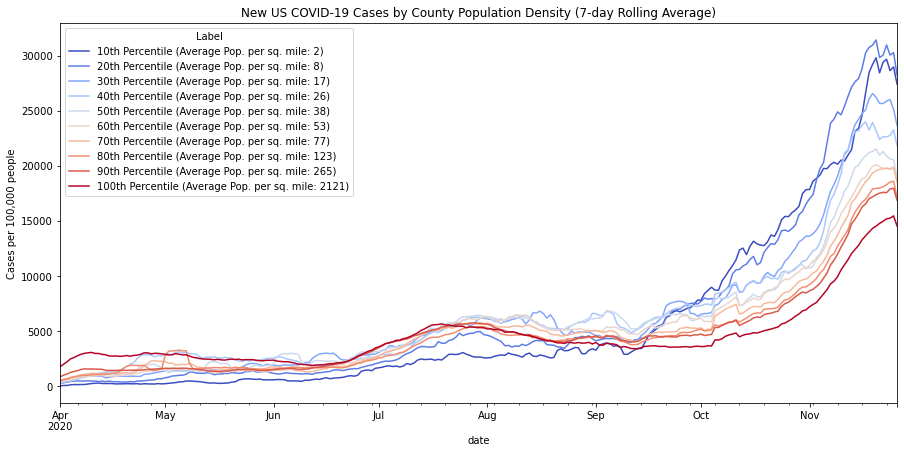

In [11]:
grouped = merge_df[merge_df['date'] >= '04-01-2020'].groupby(['date', 'Label']).sum()
grouped = grouped.reset_index()
cases_pivot = grouped.pivot(index = 'date', columns = 'Label', values = 'new cases per 100k')

# move 100th percentile column from front to back
cols = list(cases_pivot.columns)
cols = cols[1:10] + cols[0:1]
cases_pivot = cases_pivot[cols]

ax = cases_pivot.plot(figsize = (15, 7), colormap = 'coolwarm')
ax.set_ylabel('Cases per 100,000 people')
ax.set_title('New US COVID-19 Cases by County Population Density (7-day Rolling Average)')

Text(0.5, 1.0, 'New US COVID-19 Deaths by County Population Density (7-day Rolling Average)')

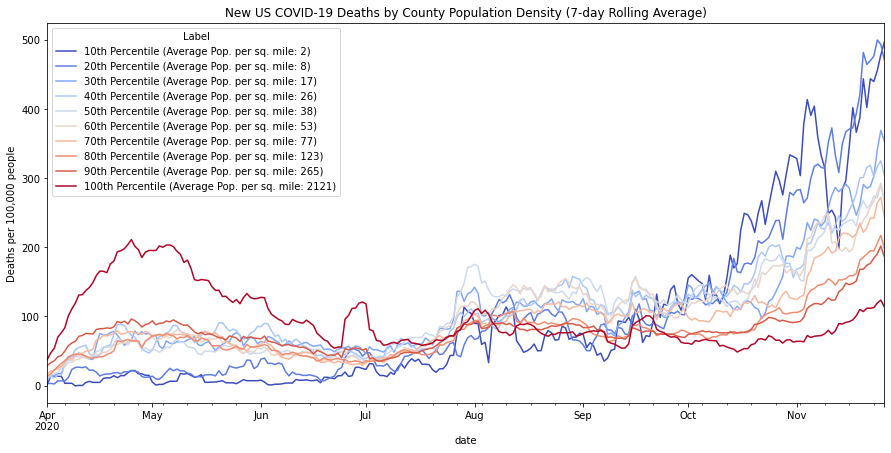

In [12]:
deaths_pivot = grouped.pivot(index = 'date', columns = 'Label', values = 'new deaths per 100k')
ax = deaths_pivot[cols].plot(figsize = (15, 7), colormap = 'coolwarm')
ax.set_ylabel('Deaths per 100,000 people')
ax.set_title('New US COVID-19 Deaths by County Population Density (7-day Rolling Average)')